# Portfolio Ciência de Dados


In [32]:
import pandas as pd
from datetime import datetime

# Passo 1 : Importar a base de dados

tabela = pd.read_csv('electricityConsumptionAndProductioction.csv')
tabela = tabela.drop('DateTime', axis=1)
display(tabela)

display(tabela.info())

,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
0,6352,6527,1395,79,1383,1896,1744,0,30
1,6116,5701,1393,96,1112,1429,1641,0,30
2,5873,5676,1393,142,1030,1465,1616,0,30
3,5682,5603,1397,191,972,1455,1558,0,30
4,5557,5454,1393,159,960,1454,1458,0,30
...,...,...,...,...,...,...,...,...,...
36767,6500,6643,1407,111,3084,933,1047,0,60
36768,6471,6484,1408,58,2983,933,1042,0,60
36769,6194,6413,1406,39,2938,935,1031,0,62
36770,5708,6217,1406,8,2823,917,1001,0,61


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36772 entries, 0 to 36771
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Consumption    36772 non-null  int64
 1   Production     36772 non-null  int64
 2   Nuclear        36772 non-null  int64
 3   Wind           36772 non-null  int64
 4   Hydroelectric  36772 non-null  int64
 5   Oil and Gas    36772 non-null  int64
 6   Coal           36772 non-null  int64
 7   Solar          36772 non-null  int64
 8   Biomass        36772 non-null  int64
dtypes: int64(9)
memory usage: 2.5 MB


None

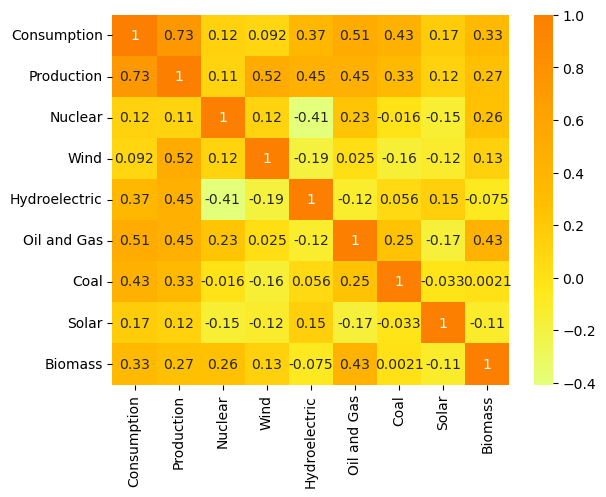

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Passo 2: Análise exploratória

sns.heatmap(tabela.corr(), annot=True, cmap='Wistia')

plt.show()

In [34]:
from sklearn.model_selection import train_test_split

# Passo 3: Criar e Treinar a IA

y = tabela['Consumption']
x = tabela.drop('Consumption', axis=1)

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.4, random_state=1)

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)

RandomForestRegressor()

In [36]:
from sklearn import metrics

# Passo 4: Testar e avaliar qual a melhor IA

previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

print(metrics.r2_score(y_teste, previsao_regressaolinear))
print(metrics.r2_score(y_teste, previsao_arvoredecisao))  

0.6893528346195282
0.8422238423835914


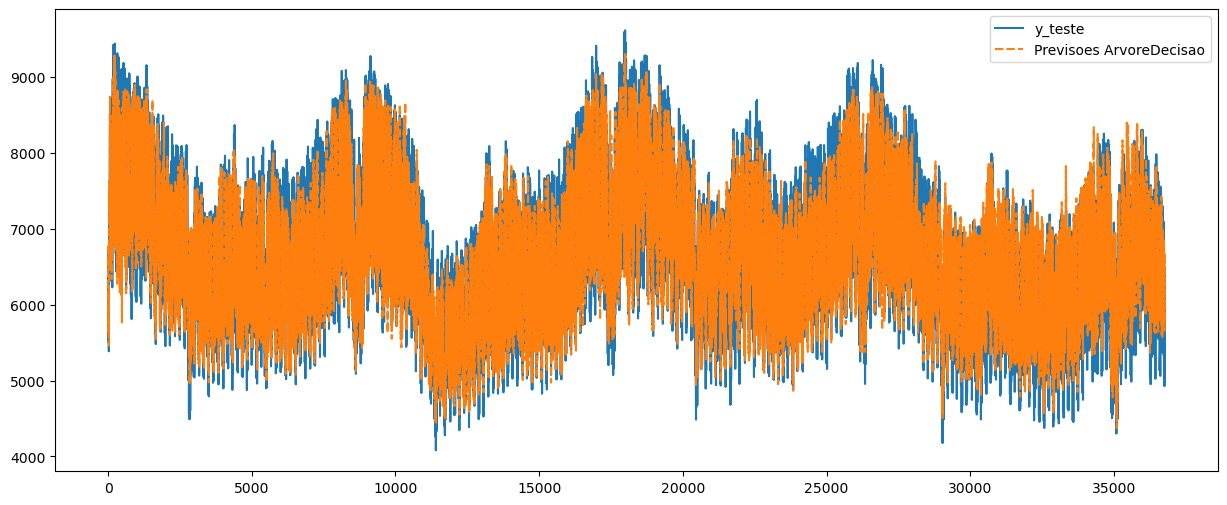

In [37]:
# Passo 5: Visualização Grafica das previsões

tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["y_teste"] = y_teste
tabela_auxiliar["Previsoes ArvoreDecisao"] = previsao_arvoredecisao

plt.figure(figsize=(15,6))
sns.lineplot(data=tabela_auxiliar)
plt.show()